### Imports

In [68]:
# Making imports convenient
import sys
import os
PATH=os.getcwd().split('/notebooks')[0]
sys.path.insert(1, PATH)

import pandas as pd
import dataframe_image as dfi
import seaborn as sn

from src.inference.inference_utils import *

DATA_PATH =  PATH + '/data/Inference/'

### Load data

In [60]:
ctk = pd.read_csv(DATA_PATH + 'ctk.csv')
denik = pd.read_csv(DATA_PATH + 'denik.csv')
lidovky = pd.read_csv(DATA_PATH + 'lidovky.csv')
novinky = pd.read_csv(DATA_PATH + 'novinky.csv')
idnes = pd.read_csv(DATA_PATH + 'idnes.csv')

data = pd.concat([ctk,denik,lidovky,novinky,idnes])

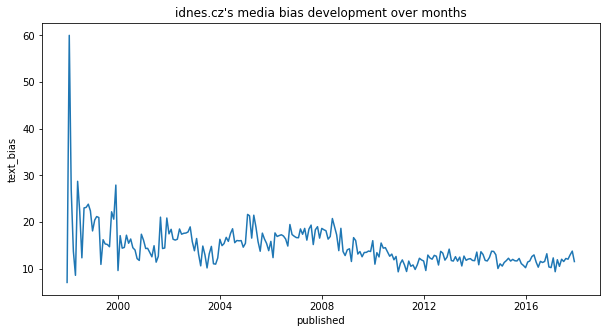

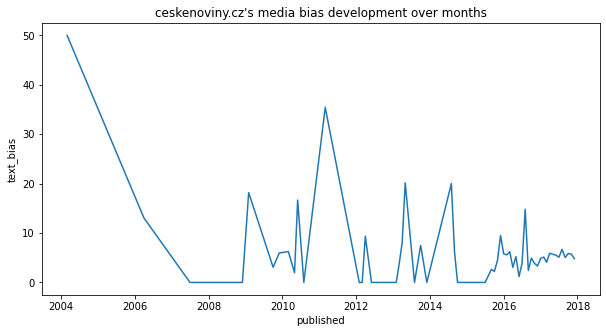

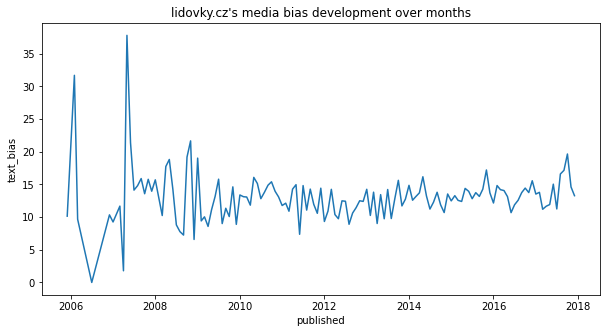

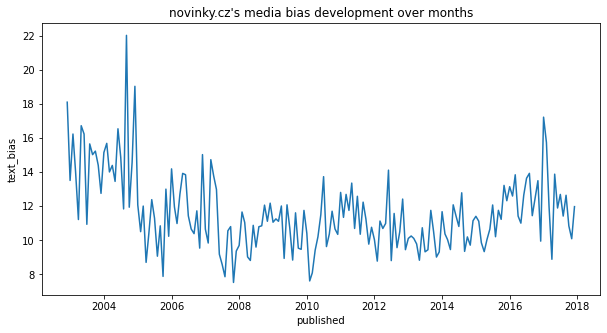

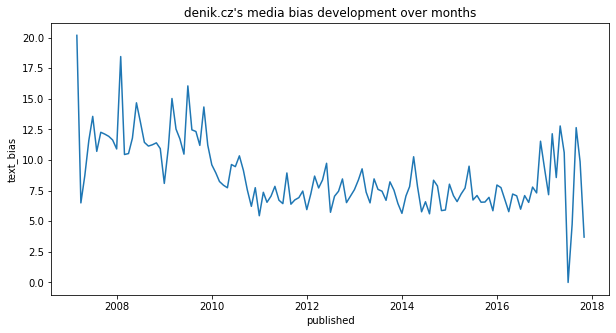

In [4]:
plot_in_time(idnes,level='months')
plot_in_time(ctk,level='months')
plot_in_time(lidovky,level='months')
plot_in_time(novinky,level='months')
plot_in_time(denik,level='months')

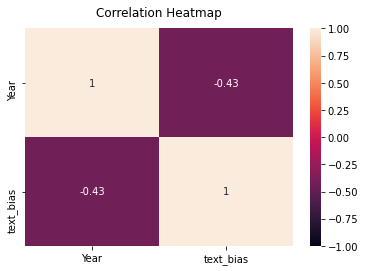

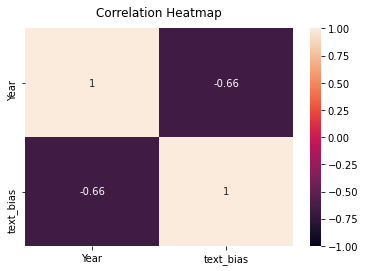

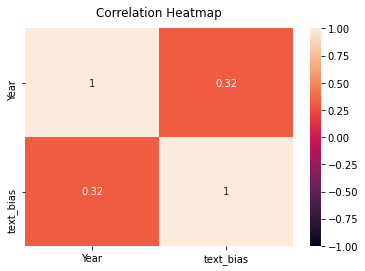

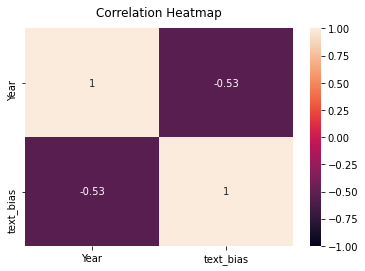

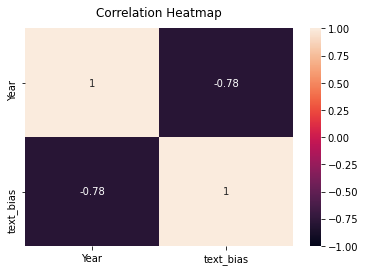

In [6]:
over_time_corr(ctk)
over_time_corr(denik)
over_time_corr(lidovky)
over_time_corr(novinky)
over_time_corr(idnes)

In [32]:
section_bias(ctk)

,section,text_bias
2,zpravy,5.268509
1,pr,7.870605
0,ceskenoviny,10.024480


In [34]:
section_bias(denik)

,section,text_bias
22,radar,0.000000
8,ekonomika,2.887658
26,reklama,3.125000
37,vzdelavani,4.000000
30,special,4.166667
2,bydleni,4.795204
19,krimi,4.842437
38,zdravi,4.976201
1,auto,5.318057
16,klasa,6.250000


In [35]:
section_bias(lidovky)

,section,text_bias
3,pr,0.833333
0,byznys,5.433510
4,relax,8.663408
2,lidovky,14.347818
5,sport,15.713817
1,cestovani,17.232476


In [36]:
section_bias(novinky)

,section,text_bias
4,ekonomika,3.353510
7,kariera,3.603703
5,finance,5.154856
10,krimi,6.830005
6,irak,8.580788
17,vanoce,8.629761
18,zahranicni,8.760475
1,bydleni,8.767557
3,domaci,9.679795
13,novinky,10.173603


In [37]:
section_bias(idnes)

,section,text_bias
14,kraje,0.000000
27,reality,2.475845
34,volby,5.208333
8,ekonomika,5.567823
25,plzen,5.845502
26,praha,6.176339
20,olomouc,6.190911
30,sdeleni,6.843331
9,finance,6.915148
38,zlin,7.004961


In [45]:
df_styled = section_bias(denik[denik['section']]).style.background_gradient()
dfi.export(df_styled,"mytable.png")

In [58]:
small_sections_out = denik[denik['section'].groupby(denik['section']).transform('size')>50]
section_bias(small_sections_out)

,section,text_bias
5,ekonomika,2.887658
2,bydleni,4.795204
16,zdravi,4.976201
1,auto,5.318057
4,denik,7.577571
11,motorismus,7.714775
12,praha,7.845108
8,hokej,8.138186
13,regiony,8.447861
3,cestovani,8.831903


<AxesSubplot:xlabel='text_bias', ylabel='Count'>

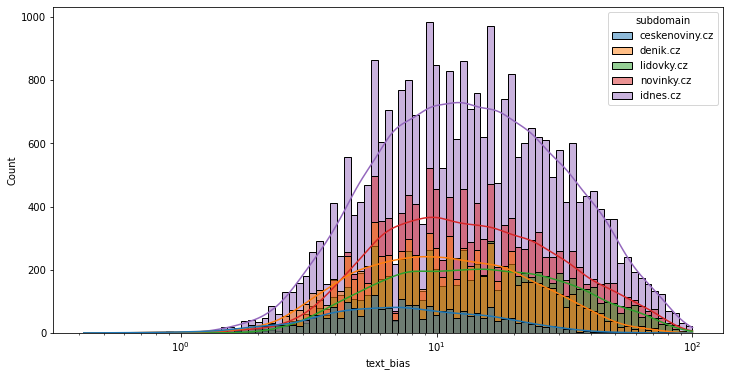

In [82]:
plt.figure(figsize=(12, 6))
sn.histplot(data[data['text_bias']!=0],x='text_bias',hue='subdomain',log_scale=True,kde=True)